In [1]:
cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/cells_meta.tsv"
indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/top/scrap"
clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/cells_meta.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/single"
# clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

ntop_clones = 10
af_thresh = 0.001
cov_thresh = 2
ntop_vars=10

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"



In [2]:
import src.utils.variant_utils as vu
from collections import OrderedDict
from matplotlib.lines import Line2D
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch
from src.utils.data_io import reverse_ids


In [4]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
top_clones = clone_order[:ntop_clones]
top_clones

array(['0_49', '0_48', '0_47', '0_46', '0_44', '0_42', '0_33', '0_1',
       '0_0', '0_2'], dtype=object)

In [5]:
clone_order

array(['0_49', '0_48', '0_47', '0_46', '0_44', '0_42', '0_33', '0_1',
       '0_0', '0_2', '0_3', '0_6', '0_4', '0_7', '0_5', '0_9', '0_10',
       '0_8', '0_11', '0_12', '0_13', '0_14', '0_15', '0_17', '0_16',
       '0_18', '0_19', '0_21', '0_20', '0_23', '0_24', '0_22', '0_25',
       '0_26', '0_27', '0_28', '0_29', '0_32', '0_31', '0_30', '0_34',
       '0_37', '0_36', '0_35', '0_39', '0_38', '0_40', '0_41', '0_43',
       '0_45', '0_50'], dtype=object)

In [6]:
#af_indir = join(indir, "sc_af", f"donor{DONOR}")
af_indir = indir

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


#out_f = join(outdir, f"donor{DONOR}")


In [7]:
#donor_vars = AF_df>0.9

In [8]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta = reverse_ids(cells_meta)
cells_meta

,cloneID,clusterID,condition,donor
AAACGAAAGCGAGAAA-1_Control,0_15,MPP/CMP/GMP C,Control,0
AAACGAAAGTACAGAT-1_Control,0_9,erythroid,Control,0
AAACGAACACTCGCAG-1_Control,0_21,neutrophil,Control,0
AAACGAATCAGGCGCT-1_Control,0_24,macrophage,Control,0
AAACGAATCCATCGAA-1_Control,0_13,MPP/CMP/GMP C,Control,0
...,...,...,...,...
TTTGTGTGTAGGGTCA-1_Input,0_43,MPP/CMP/GMP B,Input,0
TTTGTGTGTTTCTTAC-1_Input,0_6,MPP/CMP/GMP B,Input,0
TTTGTGTTCCTGAAAC-1_Input,0_11,MEP,Input,0
TTTGTGTTCGGGAAAC-1_Input,0_37,MPP/CMP/GMP B,Input,0


## Get donor-specific variants

number of donor vars: 28


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


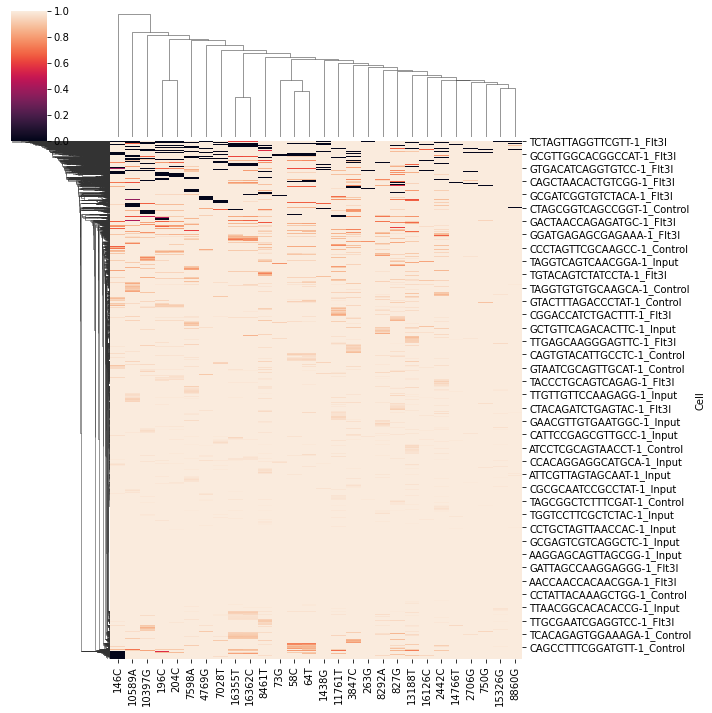

In [9]:
def get_high_variants(df, thresh, pct_thresh):
    """ Remove rows that have an average higher than threshold

    :param df:
    :param thresh:
    :return:
    """
    n_pct = pct_thresh*df.shape[0]
    return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


donor_vars = get_high_variants(AF_df, thresh=0.8, pct_thresh=0.9)
print(f"number of donor vars: {len(donor_vars)}")

if len(donor_vars)>1:
    g = sns.clustermap(AF_df.loc[:, donor_vars])
    g.fig.savefig(fname=join(outdir, f"donor_variants.pdf"))
#plt.savefig(join(outdir, "donor_vars.png"))

## variant types

In [10]:
# Get variant types
variants_df = vu.add_ref_to_variants(variants=AF_df.columns.values,
                                     mt_df=vu.load_mt_ref(mt_ref))

variants_df = vu.type_of_variants(variants_df, to_preproc=False)

In [11]:
variants_df.head()

,pos,ref,alt,variant type,variant change
10397G,10397,A,G,Transition,A>G
10463C,10463,T,C,Transition,T>C
10559G,10559,A,G,Transition,A>G
10589A,10589,G,A,Transition,G>A
11251G,11251,A,G,Transition,A>G


## Filter for clone

In [12]:
AF_df = AF_df.transpose()
DP_df = DP_df.transpose()

In [13]:
AF_df.head()

Cell,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
10397G,1.000000,1.0,0.0,0.8,1.0,1.0,1.0,1.0,1.000000,1.0,...,0.979798,1.000000,1.0,1.000000,1.000000,1.000000,1.0,0.978495,1.0,1.000000
10463C,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10559G,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.062500,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10589A,0.882353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.000000,0.984848,1.0,0.970588,0.736842,0.966102,1.0,1.000000,1.0,1.000000
11251G,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,...,0.000000,0.036145,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.023256


## Remove donor-specific variants

In [14]:
# Remove Donor variannts
AF_df = AF_df.loc[~(AF_df.index.isin(donor_vars))]
DP_df = DP_df.loc[AF_df.index, AF_df.columns] 

# Figure: 1: barplot for each clone, where x=Variant, and the % of cells (and raw) in the clone that has the variant and % of cells from other clone with variant


In [15]:
top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)] 
top_cells_meta

,cloneID,clusterID,condition,donor
AAACTCGAGTGAAGGA-1_Control,0_0,monocyte,Control,0
AACAAAGTCAAGTTGC-1_Control,0_2,meg/erythroid,Control,0
AACAAAGTCCTCTCTT-1_Control,0_33,erythroid,Control,0
AACAGTCAGGACTTTC-1_Control,0_1,neutrophil B,Control,0
AACAGTCCAGAAGTGC-1_Control,0_0,macrophage,Control,0
...,...,...,...,...
TTTGAGGGTAAGTGCG-1_Input,0_0,MPP/CMP/GMP B,Input,0
TTTGCGCTCAGTTGAC-1_Input,0_0,MPP/CMP/GMP,Input,0
TTTGGTTAGGTAAGTT-1_Input,0_0,MPP/CMP/GMP B,Input,0
TTTGGTTTCATCATGG-1_Input,0_2,MPP/CMP/GMP B,Input,0


In [16]:
bin_AF_df = (AF_df > af_thresh) & (DP_df > cov_thresh)
bin_AF_df

Cell,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
10463C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10559G,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
11251G,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
11453A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11719A,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11812G,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13368A,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
14233G,False,False,False,False,False,False,False,True,False,False,...,True,True,True,False,False,False,False,True,True,False
14674C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14905A,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


## Create variant-clone (and non-clone) percent of cells in clone with variant

In [17]:
def calc_clone_pct(data, **kwargs):
    curr_AF_df = bin_AF_df.loc[:,data.index]
    other_curr_AF_df = bin_AF_df.loc[:, ~(bin_AF_df.columns.isin(data.index))]
    
    curr_AF_tot = curr_AF_df.sum(axis=1)
    curr_AF_pct = 100*curr_AF_tot/curr_AF_df.shape[1]
    
    other_curr_AF_tot = other_curr_AF_df.sum(axis=1)
    other_curr_AF_pct = 100*other_curr_AF_tot/other_curr_AF_df.shape[1]
        
    return pd.concat((pd.DataFrame(curr_AF_pct).rename({0:"clone_pct"}, axis=1),
               pd.DataFrame(other_curr_AF_pct).rename({0:"other_clone_pct"}, axis=1)),axis=1, 
             ignore_index=False).rename_axis("variant")
    

pct_clones_df = top_cells_meta.groupby("cloneID").apply(calc_clone_pct).reset_index()
pct_clones_df

,cloneID,variant,clone_pct,other_clone_pct
0,0_0,10463C,1.237624,4.803341
1,0_0,10559G,6.188119,5.963569
2,0_0,11251G,6.435644,7.518274
3,0_0,11453A,2.475248,2.877364
4,0_0,11719A,5.445545,8.713308
...,...,...,...,...
395,0_49,709A,0.000000,6.931352
396,0_49,8697A,16.666667,6.454475
397,0_49,8743A,0.000000,0.920484
398,0_49,930A,0.000000,5.988688


## Rank variants for each clone by sorting by mannwhitneyu test of allele-frequency


In [18]:
from scipy.stats import mannwhitneyu

In [19]:
def rank_unique_vars_clone_af(clone_cells):
    clones_af = AF_df.loc[:,clone_cells.index]
    other_clones_af = AF_df.loc[:, ~(AF_df.columns.isin(clone_cells.index))]
    pvals = mannwhitneyu(clones_af, other_clones_af, alternative='greater', axis=1).pvalue
    rankings = pd.DataFrame(index=clones_af.index,data=pvals).rank(method="min").rename({0:"rank"}, axis=1) # np.argsort(pvals)
    #print(type(rankings))
    #print('rankings', rankings)

    rankings["pval"] = pvals
    rankings["rank"]= rankings["rank"].astype('int')
    #print('rankings', rankings)
    #print('rankings', rankings.head())
    rankings.index.name = "variant"
    return rankings

pvals_df = cells_meta.groupby("cloneID").apply(rank_unique_vars_clone_af).reset_index()
pvals_df

,cloneID,variant,rank,pval
0,0_0,10463C,40,0.999622
1,0_0,10559G,8,0.476216
2,0_0,11251G,18,0.821374
3,0_0,11453A,12,0.699135
4,0_0,11719A,33,0.990840
...,...,...,...,...
2035,0_9,709A,34,0.999996
2036,0_9,8697A,21,0.999818
2037,0_9,8743A,6,0.846863
2038,0_9,930A,28,0.999977


In [20]:
pct_pvals_df = pd.merge(pct_clones_df, pvals_df, on=["cloneID", "variant"])
pct_pvals_df

,cloneID,variant,clone_pct,other_clone_pct,rank,pval
0,0_0,10463C,1.237624,4.803341,40,0.999622
1,0_0,10559G,6.188119,5.963569,8,0.476216
2,0_0,11251G,6.435644,7.518274,18,0.821374
3,0_0,11453A,2.475248,2.877364,12,0.699135
4,0_0,11719A,5.445545,8.713308,33,0.990840
...,...,...,...,...,...,...
395,0_49,709A,0.000000,6.931352,31,0.747940
396,0_49,8697A,16.666667,6.454475,5,0.137980
397,0_49,8743A,0.000000,0.920484,11,0.593499
398,0_49,930A,0.000000,5.988688,25,0.731707


In [21]:
# pct_pvals_df["variant type"] = pct_pvals_df["variant"].apply(lambda x: variants_df.loc[x, "variant type"])
# pct_pvals_df["variant change"] = pct_pvals_df["variant"].apply(lambda x: variants_df.loc[x, "variant change"])
# pct_pvals_df["variant type"] = ["Ts" if x =="Transition" else "Tv" for x in pct_pvals_df["variant type"].values]
# pct_pvals_df

In [22]:
pct_clones_df["variant type"] = pct_clones_df["variant"].apply(lambda x: variants_df.loc[x, "variant type"])
#pct_clones_df["variant change"] = pct_clones_df["variant"].apply(lambda x: variants_df.loc[x, "variant change"])
#pct_clones_df["variant type"] = ["Ts" if x =="Transition" else "Tv" for x in pct_clones_df["variant type"].values]

In [23]:
pct_clones_df.groupby(["cloneID", "variant type"]).size()

cloneID  variant type
0_0      Transition      39
         Transversion     1
0_1      Transition      39
         Transversion     1
0_2      Transition      39
         Transversion     1
0_33     Transition      39
         Transversion     1
0_42     Transition      39
         Transversion     1
0_44     Transition      39
         Transversion     1
0_46     Transition      39
         Transversion     1
0_47     Transition      39
         Transversion     1
0_48     Transition      39
         Transversion     1
0_49     Transition      39
         Transversion     1
dtype: int64

In [24]:
def plot_pct_bar(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    data = data.set_index("variant")
    if ntop_vars != 0:
        data = data[data['rank']<ntop_vars].sort_values("rank")
        ax = data[["clone_pct", "other_clone_pct"]].plot.bar(ax=plt.gca())
        plt.gca().set_ylabel("% cells with variant")
            
    else:
        data = data.loc[(data["clone_pct"]-data["other_clone_pct"]).sort_values()[::-1].index]
        #print(data[data==0].head())
        #data = data.sort_values("clone_pct")[::-1]
        #print(data["clone_pct"]-data["other_clone_pct"])
        
        var_type_leg_order = OrderedDict()
        for vt in data["variant type"].values:
            var_type_leg_order[vt] = True
        var_type_leg_order = list(var_type_leg_order.keys())
        

        colors = ["blue" if i == "Transition" else "green" for i in data["variant type"].values]
        #ax = pd.DataFrame((data["clone_pct"]-data["other_clone_pct"])).plot.bar(ax=plt.gca())
        
        plt.gca().bar(x=data.index, 
                height = (data["clone_pct"].fillna(0)-data["other_clone_pct"].fillna(0)).values,
                color=colors, label=data["variant type"].values)
        plt.xticks(rotation=90)
        plt.gca().set_ylabel("(% cells in clone with variant) - (%cells not in clone with variant)")
        custom_lines = [Line2D([0], [0], color="blue", lw=4),
                        Line2D([0], [0], color="green", lw=4)]
        plt.gca().legend(custom_lines, ['Transition', 'Transversion'], loc='best')
        
        #ax.set_label()
        #plt.bar(data, vals, width, color=colors)
        #plt.gca().legend(loc='best') 
    return

## Figure: Barplot of percent in clone vs percent not in clone

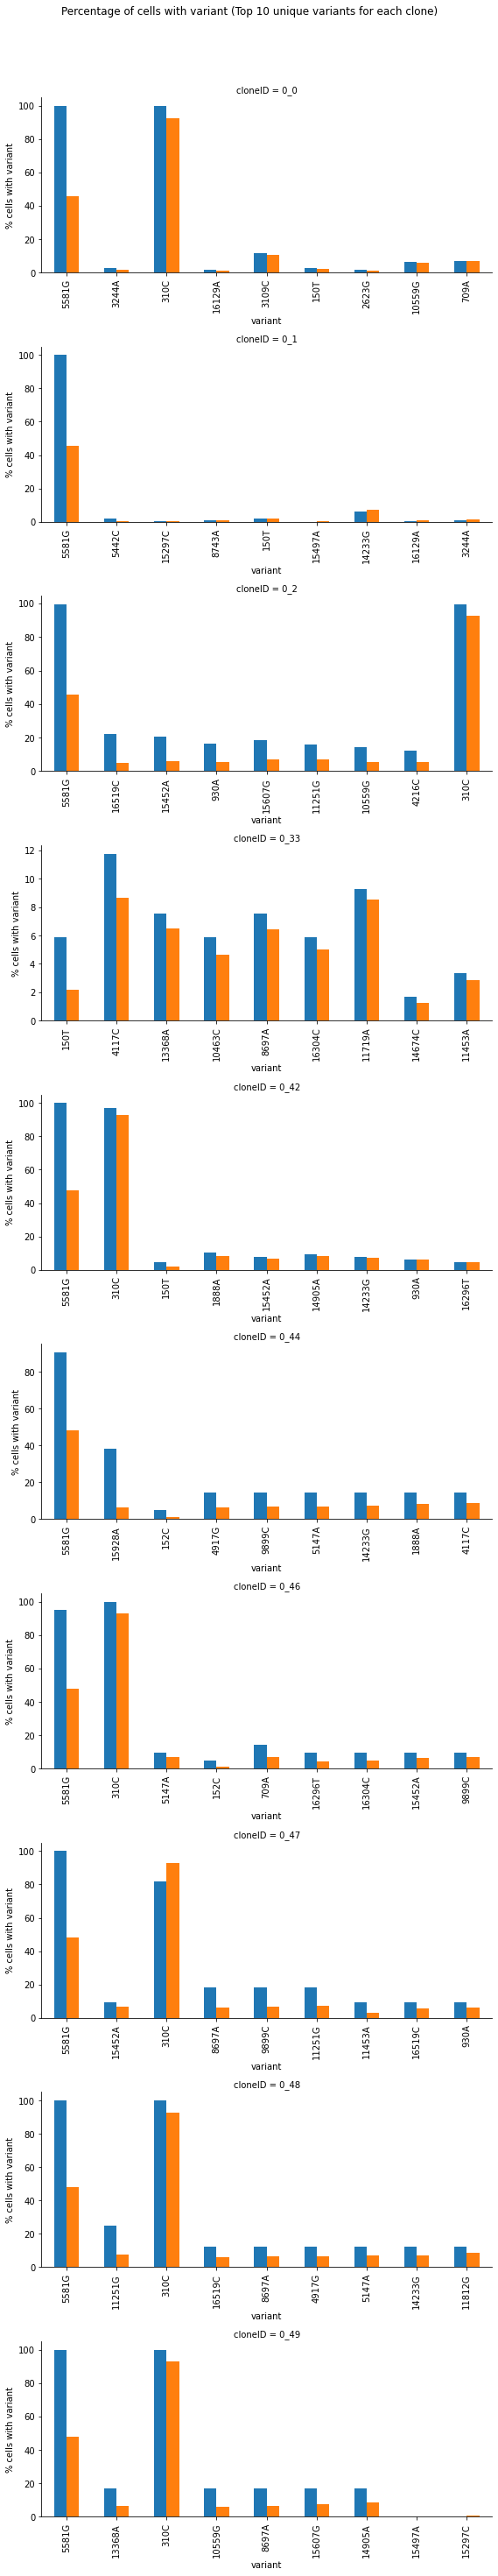

In [25]:
g = sns.FacetGrid(data=pct_pvals_df, col = "cloneID", col_wrap=1, height=4, aspect=2,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar, ntop_vars=ntop_vars)
g.fig.suptitle(f"Percentage of cells with variant (Top {ntop_vars} unique variants for each clone)", y=1.02)
g.fig.savefig(fname=join(outdir, f"top_variants_distinct_pct_vs_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_distinct_pct_vs_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

plt.tight_layout()


## Figure: Barplot of percent in clone - percent not in clone. Showing for all variants

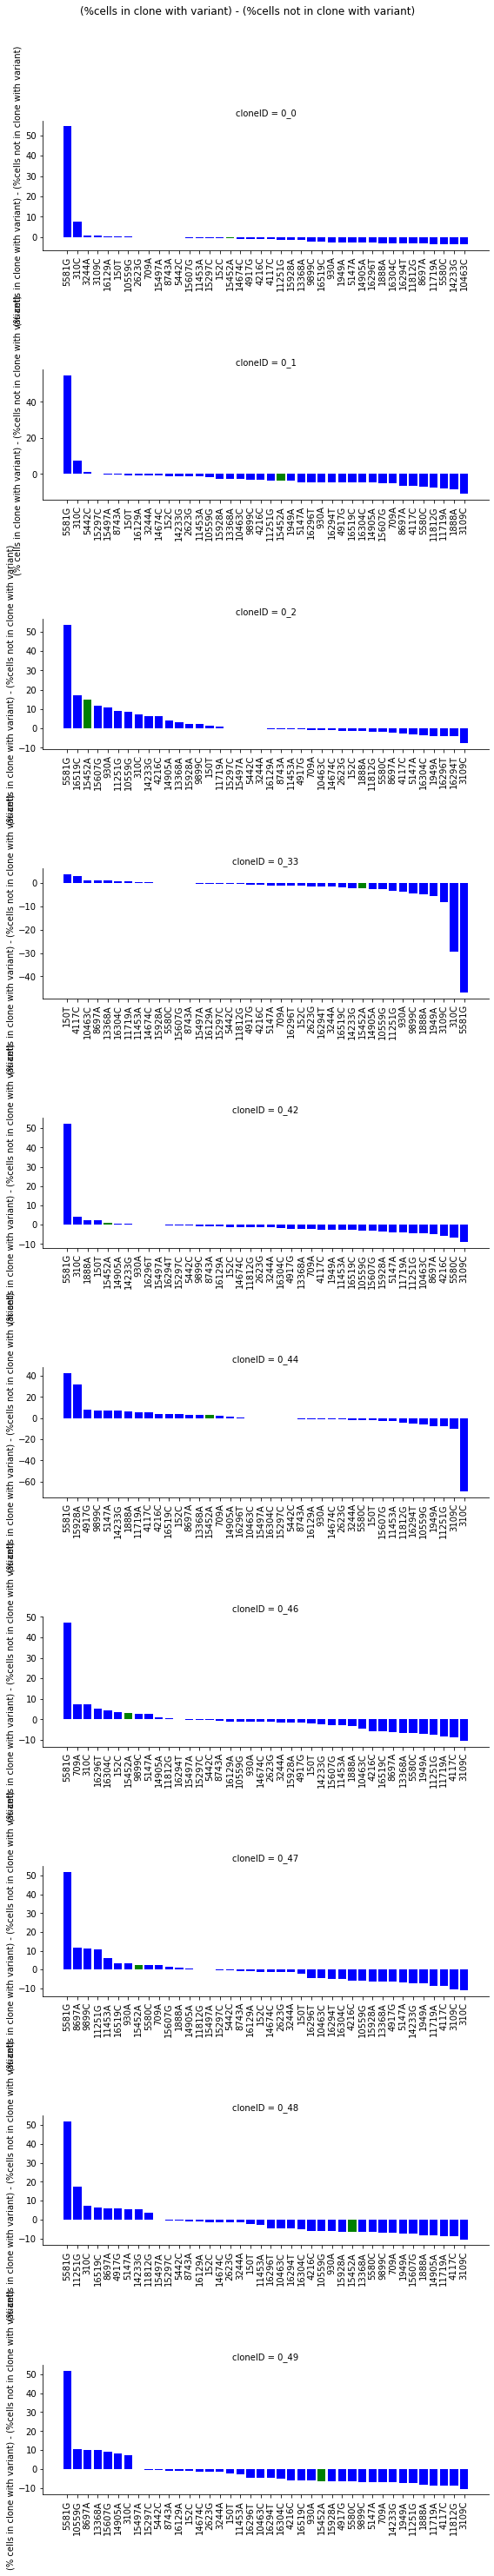

In [26]:
g = sns.FacetGrid(data=pct_clones_df, col = "cloneID", col_wrap=1, height=4, aspect=2,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar)
#g.fig.legend()
#g.add_legend(["Transition", "Transversion"])
plt.tight_layout()
g.fig.suptitle("(%cells in clone with variant) - (%cells not in clone with variant)", y=1.02)
g.fig.savefig(fname=join(outdir, f"top_variants_pct_minus_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_pct_minus_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)




In [27]:
def plot_violin(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    curr_clone = data["cloneID"].values[0]
    print('curr_clone', curr_clone)
    curr_AF_df = AF_df.loc[:,data.index]
    other_curr_AF_df = AF_df.loc[:, ~(AF_df.columns.isin(data.index))]
    
    curr_AF_df = curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    curr_AF_df["type"] = "clone"
    
    other_curr_AF_df = other_curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    other_curr_AF_df["type"] = "other"
    curr_merge_df = pd.concat((curr_AF_df, other_curr_AF_df), axis=0)
    curr_merge_df = curr_merge_df.rename({"index":"variant"}, axis=1)
    #print(curr_merge_df.head())
    if ntop_vars != 0:
        #print(pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)])
        if pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)].shape[0] == 0:
            return
        curr_top_vars = pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone) & (pct_pvals_df["rank"]<=ntop_vars)].sort_values("rank")["variant"].values
        print('top vars', curr_top_vars)
        #print('before top vars',curr_merge_df.shape)
        curr_merge_df = curr_merge_df[curr_merge_df["variant"].isin(curr_top_vars)] #data[data['rank']<ntop_vars].sort_values("rank")
        #print('after top vars',curr_merge_df.shape)
        
    sns.boxenplot(data=curr_merge_df, x="variant", y="AF", hue="type", ax=plt.gca())
    return 
    

## Violin plots for Allele frequency

curr_clone 0_49
top vars ['5581G' '13368A' '310C' '10559G' '8697A' '15607G' '14905A' '15497A'
 '15297C' '5442C']
curr_clone 0_48
top vars ['5581G' '11251G' '310C' '16519C' '8697A' '4917G' '5147A' '14233G'
 '11812G' '15497A']
curr_clone 0_47
top vars ['5581G' '15452A' '310C' '8697A' '9899C' '11251G' '11453A' '16519C' '930A'
 '5580C']
curr_clone 0_46
top vars ['5581G' '310C' '5147A' '152C' '709A' '16296T' '16304C' '15452A' '9899C'
 '14905A']
curr_clone 0_44
top vars ['5581G' '15928A' '152C' '4917G' '9899C' '5147A' '14233G' '1888A' '4117C'
 '11719A']
curr_clone 0_42
top vars ['5581G' '310C' '150T' '1888A' '15452A' '14905A' '14233G' '930A' '16296T'
 '16294T']
curr_clone 0_33
top vars ['150T' '4117C' '13368A' '10463C' '8697A' '16304C' '11719A' '14674C'
 '11453A' '15928A']
curr_clone 0_1
top vars ['5581G' '5442C' '15297C' '8743A' '150T' '15497A' '14233G' '16129A'
 '3244A' '14674C']
curr_clone 0_0
top vars ['5581G' '3244A' '310C' '16129A' '3109C' '150T' '2623G' '10559G' '709A'
 '8743A']
curr_

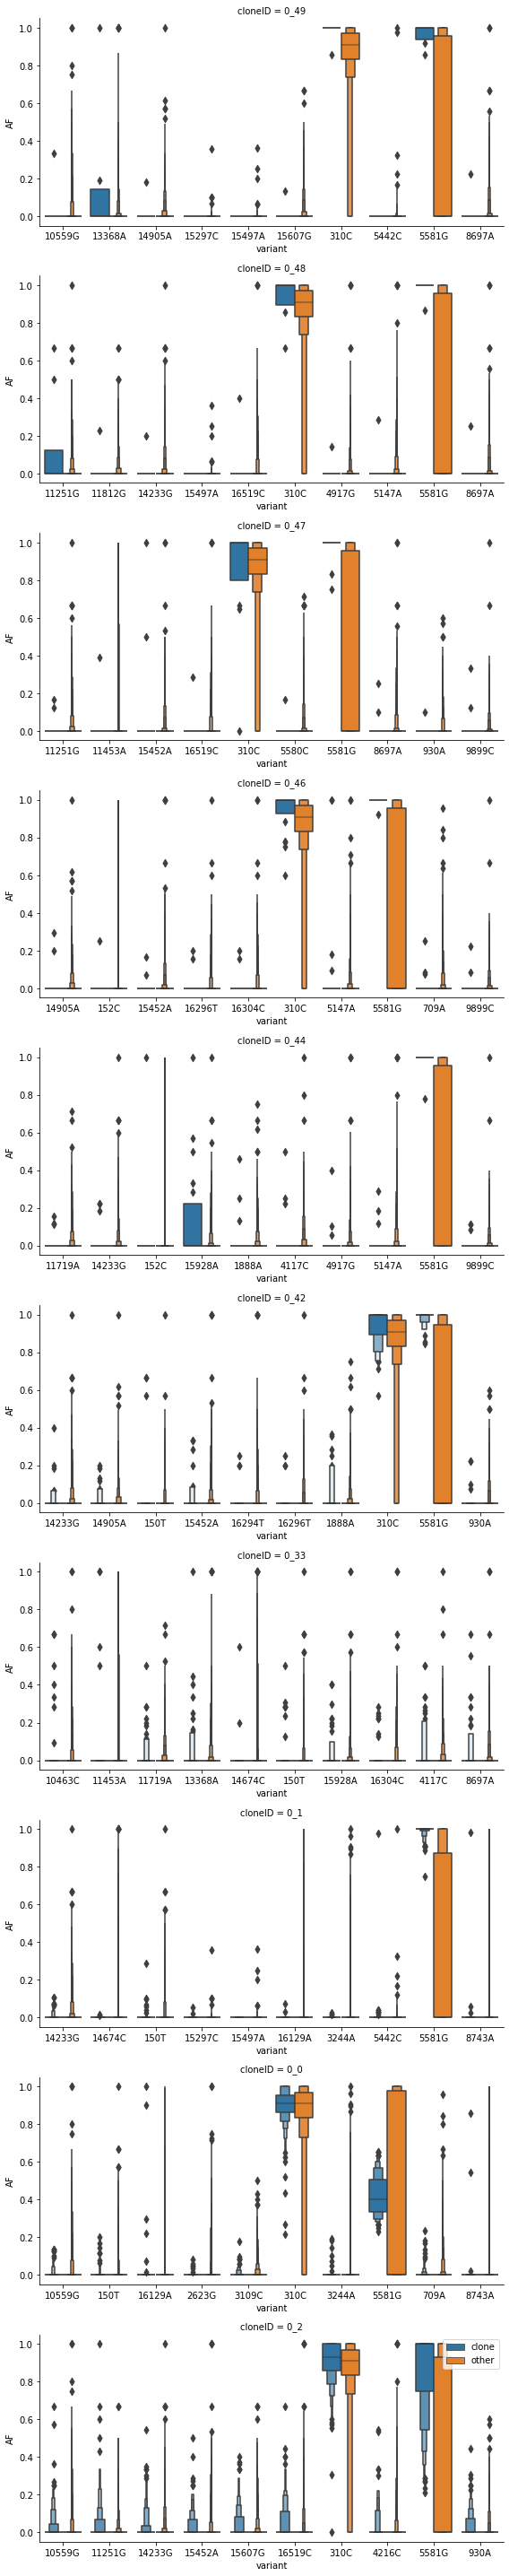

In [28]:
g = sns.FacetGrid(data=cells_meta, col="cloneID", col_order=top_clones, col_wrap=1, height=4, aspect=2, sharex=False, sharey=False)
g.map_dataframe(plot_violin, ntop_vars=10 )
plt.legend(loc='upper right')
g.fig.savefig(fname=join(outdir, f"top_variants_in_clone_af_boxen.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_in_clone_af_boxen.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)


# Plot variants as row and clone as x AF violin

In [29]:
def long_af(ser, cells_meta):
    v = ser.name
    cells_meta["Variant"] = v
    #print('ser', pd.DataFrame(ser))
    cells_meta  = pd.merge(pd.DataFrame(ser).rename({v:"af"}, axis=1), 
             cells_meta, left_index=True, right_index=True, how='inner' )
    #cells_meta.loc[ser.index, "AF"] = ser
    return cells_meta
    
long_af = AF_df.apply(long_af, cells_meta=cells_meta, axis=1)
long_af = pd.concat(long_af.values, axis=0)

In [30]:
vars_min_over_median = pct_pvals_df.groupby("variant").apply(lambda x: min(x['rank']+1)/np.median(x['rank']+1))
vars_min_over_median = vars_min_over_median.sort_values()
vars_order = vars_min_over_median.index
vars_min_over_median


variant
4117C     0.088235
11251G    0.111111
16519C    0.115385
150T      0.117647
3244A     0.130435
5147A     0.142857
3109C     0.146341
15928A    0.146341
5442C     0.166667
1888A     0.166667
13368A    0.181818
15452A    0.200000
930A      0.204082
10463C    0.204082
8697A     0.217391
11719A    0.222222
15297C    0.228571
152C      0.235294
16129A    0.263158
4917G     0.277778
8743A     0.285714
16304C    0.291667
709A      0.292683
10559G    0.294118
16296T    0.311111
2623G     0.313725
15607G    0.342857
5580C     0.349206
14674C    0.375000
9899C     0.375000
4216C     0.391304
11453A    0.400000
16294T    0.415094
14905A    0.424242
15497A    0.437500
11812G    0.444444
14233G    0.500000
1949A     0.611111
310C      0.750000
5581G     1.000000
dtype: float64

In [ ]:
nvars = len(vars_order)
nfigs = int(np.round(nvars/16))
out_fs = []
for curr_f in range(nfigs):
    end_ind = min((curr_f+1)*16, nvars)
    curr_vars = vars_order[(curr_f*16):end_ind]
    print('curr_vars', len(curr_vars), curr_vars)
    curr_file = join(outdir, f"top_variants_{curr_f+1}_{(end_ind+1)*16}_af.svg")
    g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
                sharey=False, col_order=curr_vars,
                order=top_clones, height=2, aspect=2)
    g.fig.savefig(fname=curr_file, bbox_inches='tight', pad_inches=0.5)
    out_fs.append(curr_file)
    plt.close()
cmd = f"svg_stack.py --direction=h --margin=100 {' '.join(out_fs)} > {join(outdir, 'top_variants_af.svg')}"
print(cmd)
os.system(cmd)
for f in out_fs:
    os.remove(f)
    #!{cmd}

    #g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


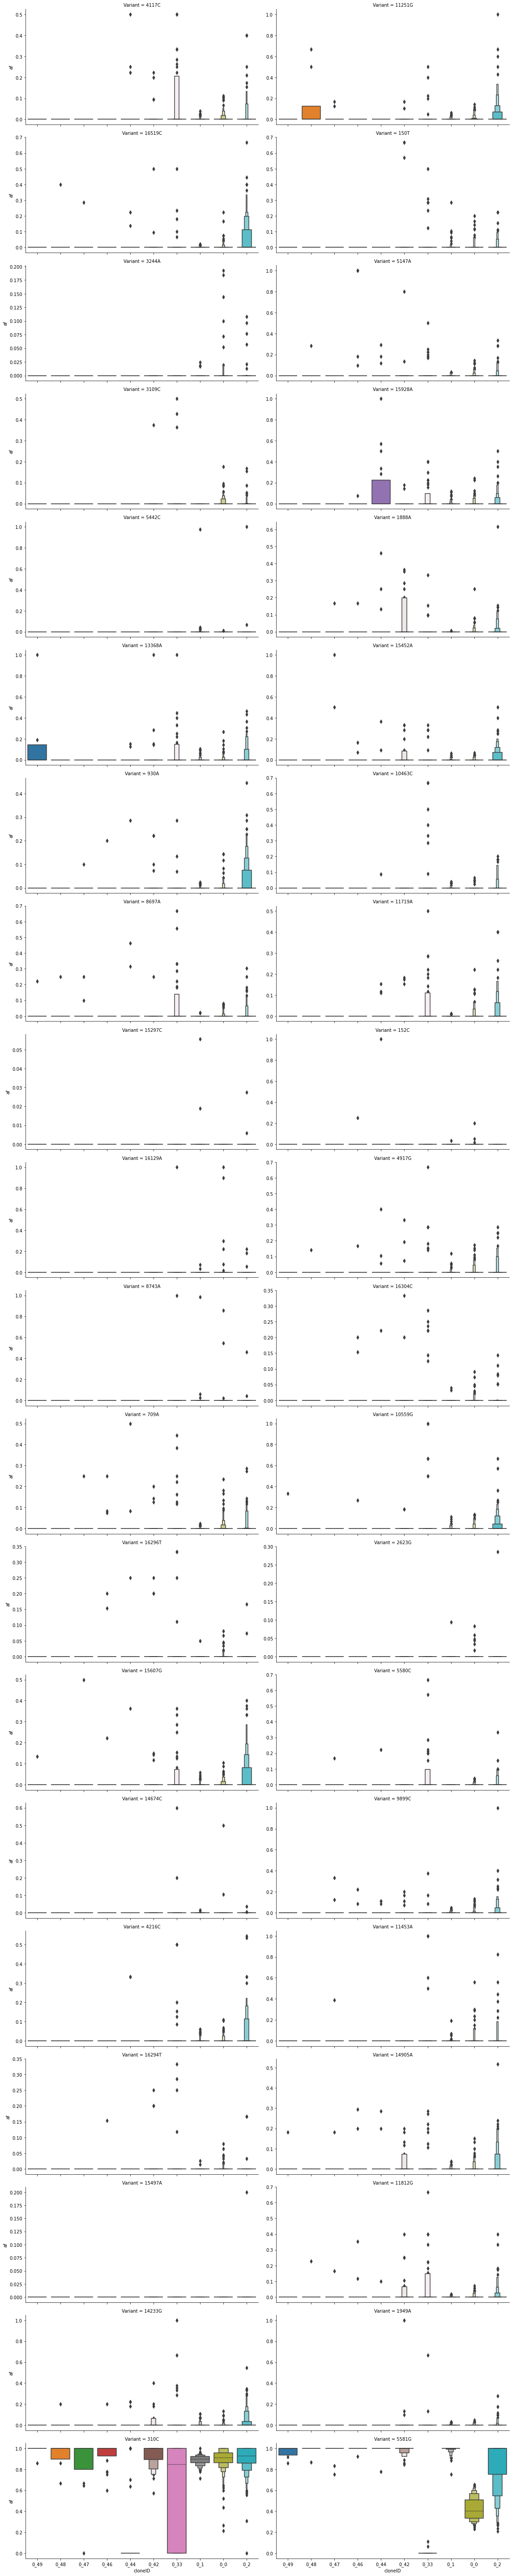

In [31]:
# g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
#             sharey=False, col_order=vars_order,
#             height=4, aspect=2, order=top_clones)
# #g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
# g.fig.savefig(fname=join(outdir, f"top_variants_af.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

## Overlapping variants across clones